<a href="https://colab.research.google.com/github/Gdearmascasta/Materias_IIND/blob/main/interpolacion_lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|   $x$  | $1.0$ |     $4.0$    |     $6.0$     |      $5.0$    |  
|--------|-------|--------------|---------------|---------------|
| $f(x)$ | $0.5$ | $0.23529412$ | $0.97297297$  | $0.96153846$  |  

a) A partir de esos datos estime el valor de $f(2.8)$ utilizando un polinomio de interpolación de LAGRANGE de tercer grado  
b) Si se conoce que la función es $f(x) = \frac{x^2}{1 + x^2}$ calcule el error porcentual de la estimación del punto a) y enuncie sus conclusiones

In [ ]:
# Guardar en las listas los valores dados en el enunciado

x: list[float] = [1.0, 4.0, 6.0, 5.0]
y: list[float] = [0.5, 0.23529412, 0.97297297, 0.96153846]
obj: float = 2.8

# Buscar el polinomio de interpolación por medio de Lagrange

In [ ]:
# Definir la función que calcula el polinomio de interpolación de Lagrange
def lagrange_pol(x:list[float], y:list[float]) -> callable:
	""" Calcula el polinomio de interpolación de Lagrange
	 dada una lista de puntos x y f(x)

	-- Entrada
    x: Lista con los valores de x
    y: Lista con los valores de f(x)

    -- Salida
    Retorna la función de interpolación obtenida """

	n: int = len(x)

	def L(value, i) -> float:
		""" Calcula Li(value) = ∏{j=0 y i!=j to n} (value - xj)/(xi - xj) """

		result: float = 1.0
		for j in range(n):
			if i != j:
				result *= (value-x[j]) / (x[i]-x[j])

		return result


	def P(value) -> float:
		""" Es la función de interpolación de la forma:
		 P(value) = Σ{i=0 to n} Yi Li(value)"""

		result: float = 0.0
		for i in range(n):
			result += y[i] * L(value, i)

		return result


	return P


# Definir la función dada en el inciso b)
def F(x) -> float:
	""" Es la función de la forma:
	 f(x) = x^2 / (1 + x^2) """
	return x*x / (1 + x*x)


## Con la lista de `x` y `y` sin cambiar

### Inciso a)

En todo caso, si se calcula la función de interpolación por medio de Lagrange, queda de la siguiente manera:

$$
P(x) = 0.5\frac{(x-4)(x-6)(x-5)}{(1-4)(1-6)(1-5)} + 0.23529412\frac{(x-1)(x-6)(x-5)}{(4-1)(4-6)(4-5)} + 0.97297297\frac{(x-1)(x-4)(x-5)}{(6-1)(6-4)(6-5)} + 0.96153846\frac{(x-1)(x-4)(x-6)}{(5-1)(5-4)(5-6)}
$$

$$
P(x) = 0.5\frac{(x-4)(x-6)(x-5)}{-60} + 0.23529412\frac{(x-1)(x-6)(x-5)}{6} + 0.97297297\frac{(x-1)(x-4)(x-5)}{10} + 0.96153846\frac{(x-1)(x-4)(x-6)}{-4}  
$$

$$
P(x) = -\frac{1}{120}(x-4)(x-6)(x-5) + 0.0392156867(x-1)(x-6)(x-5) + 0.097297297(x-1)(x-4)(x-5) - 0.240384615(x-1)(x-4)(x-6)
$$


In [ ]:
# Calcular el valor de f(2.8)
P: callable = lagrange_pol(x, y)
print(f'La estimación de f({obj}) es: {P(obj)}')

La estimación de f(2.8) es: -0.631840522096


### Inciso b)

In [ ]:
# Calcular el error porcentual
value_teo: float = F(obj)
value_exp: float = P(obj)
error: float = abs((value_teo - value_exp) / value_teo)

print(f'{value_teo = } --- {value_exp = }')
print(f'El error porcentual entre la estimación y la función real es: {error:%}')

value_teo = 0.8868778280542985 --- value_exp = -0.631840522096
El error porcentual entre la estimación y la función real es: 171.243243%


## Con la lista de `x` y `y` cambiadas para que en $x = 4$ esté en la función real

In [ ]:
y1: list[float] = [F(xi) for xi in x]
y1

[0.5, 0.9411764705882353, 0.972972972972973, 0.9615384615384616]

### Inciso a)

In [ ]:
P1: callable = lagrange_pol(x, y1)
print(f'La estimación de f({obj}) es: {P1(obj)}')

La estimación de f(2.8) es: 0.8589830011006483


### Inciso b)

In [ ]:
# Calcular el error porcentual
value_teo1: float = F(obj)
value_exp1: float = P1(obj)
error1: float = abs((value_teo1 - value_exp1) / value_teo1)

print(f'{value_teo1 = } --- {value_exp1 = }')
print(f'El error porcentual entre la estimación y la función real es: {error1:%}')

value_teo1 = 0.8868778280542985 --- value_exp1 = 0.8589830011006483
El error porcentual entre la estimación y la función real es: 3.145284%


# Gráficas con todas las comparaciones

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


dom: np.ndarray = np.linspace(0, 7)
dom1: np.ndarray = np.linspace(0, 10, 1000)

p: np.ndarray = P(dom)
p1: np.ndarray = P1(dom1)

f: np.ndarray = F(dom)
f1: np.ndarray = F(dom1)

## Sin los cambios de `x` y `y`

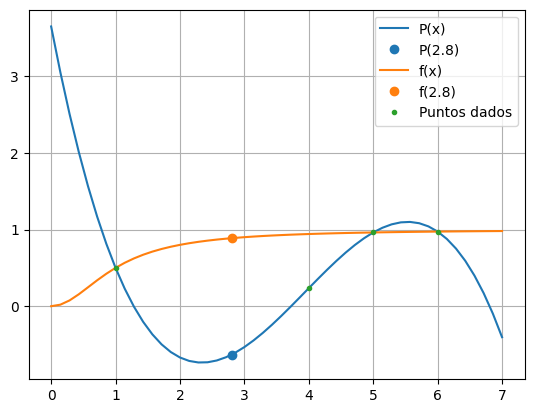

In [ ]:
plt.plot(dom, p, label='P(x)', color='#1f77b4')  # Grafica de la aproximación de f(x)
plt.plot(obj, P(obj), marker='o', linewidth=0, label=f'P({obj})')

plt.plot(dom, f, label='f(x)', color='#ff7f0e')  # Gráfica con f(x) real
plt.plot(obj, F(obj), marker='o', linewidth=0, label=f'f({obj})')

plt.plot(x, y, marker='.', linewidth=0, label='Puntos dados')  # Gráfica con los puntos dados en el enunciado

plt.legend()
plt.grid()
plt.show()

## Con los cambios de `x` y `y`

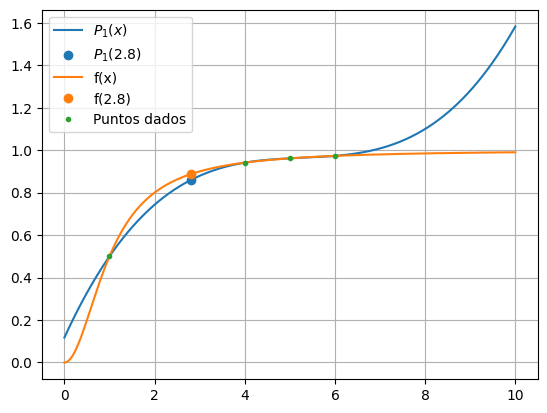

In [ ]:
plt.plot(dom1, p1, label='$P_1(x)$', color='#1f77b4')  # Grafica de la aproximación de f(x)
plt.plot(obj, P1(obj), marker='o', linewidth=0, label=f'$P_1({obj})$')

plt.plot(dom1, f1, label='f(x)', color='#ff7f0e')  # Gráfica con f(x) real
plt.plot(obj, F(obj), marker='o', linewidth=0, label=f'f({obj})')

plt.plot(x, y1, marker='.', linewidth=0, label='Puntos dados')  # Gráfica con los puntos dados en el enunciado

plt.legend()
plt.grid()
plt.show()